The RMS Titanic was known as the unsinkable ship and was the largest, most luxurious
passenger ship of its time. Sadly, the British ocean liner sank on April 15, 1912,
killing over 1500 people while just 705 survived.

Exploratory Data Analysis (EDA) of the titanic dataset
See https://www.encyclopedia-titanica.org/

The dataset contains a mix of textual, boolean, continuous, and categorical variables, and has
missing values.

In [1]:
# Imports

from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import missingno as msno
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
# Load the original titanic dataset and view
eda = pd.read_csv("datasets/original_titanic.csv")
eda.head()

pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

     age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.00      0      0   24160  211.3375       B5        S    2    NaN   
1   0.92      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.00      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  
3  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON

In [3]:
eda.tail()

pclass  survived                       name     sex   age  sibsp  parch  \
1304       3         0       Zabour, Miss. Hileni  female  14.5      1      0   
1305       3         0      Zabour, Miss. Thamine  female   NaN      1      0   
1306       3         0  Zakarian, Mr. Mapriededer    male  26.5      0      0   
1307       3         0        Zakarian, Mr. Ortin    male  27.0      0      0   
1308       3         0         Zimmerman, Mr. Leo    male  29.0      0      0   

      ticket     fare cabin embarked boat   body home.dest  
1304    2665  14.4542   NaN        C  NaN  328.0       NaN  
1305    2665  14.4542   NaN        C  NaN    NaN       NaN  
1306    2656   7.2250   NaN        C  NaN  304.0       NaN  
1307    2670   7.2250   NaN        C  NaN    NaN       NaN  
1308  315082   7.8750   NaN        S  NaN    NaN       NaN

In [4]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [5]:
# View the statistical details
eda.describe()

pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean      2.294882     0.381971    29.881138     0.498854     0.385027   
std       0.837836     0.486055    14.413493     1.041658     0.865560   
min       1.000000     0.000000     0.170000     0.000000     0.000000   
25%       2.000000     0.000000    21.000000     0.000000     0.000000   
50%       3.000000     0.000000    28.000000     0.000000     0.000000   
75%       3.000000     1.000000    39.000000     1.000000     0.000000   
max       3.000000     1.000000    80.000000     8.000000     9.000000   

              fare        body  
count  1308.000000  121.000000  
mean     33.295479  160.809917  
std      51.758668   97.696922  
min       0.000000    1.000000  
25%       7.895800   72.000000  
50%      14.454200  155.000000  
75%      31.275000  256.000000  
max     512.329200  328.000000

In [6]:
# Check for Null values in the dataset, before performing any
# cleaning on that particular column.
eda.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

<AxesSubplot:>

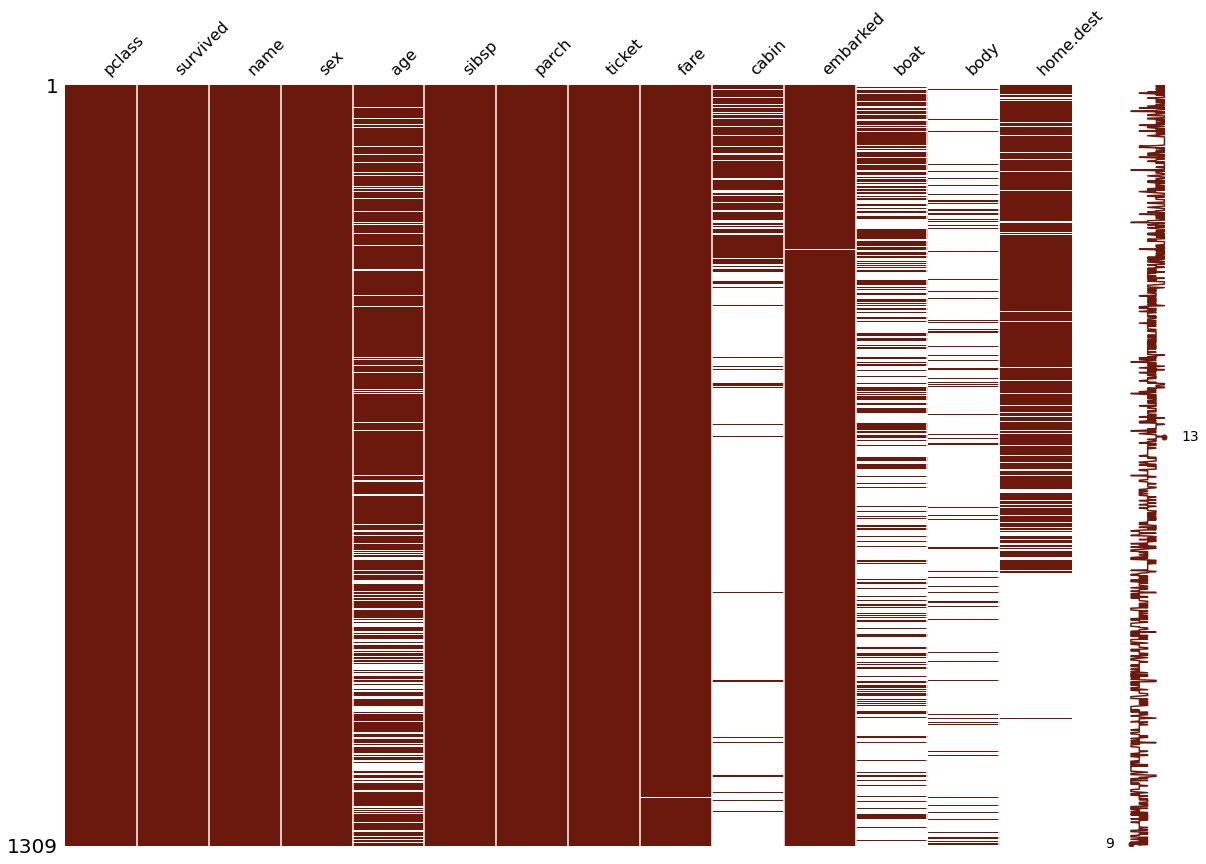

In [7]:
# Visualise missing values in the dataset
# Null or missing values by columns
msno.matrix(df=eda, figsize=(20, 14), color=(0.42, 0.1, 0.05))

The missing values become much more apparent and clear when visualised, where the empty white
bands (data that is missing) superposed on the vertical dark red bands (non-missing data)
reflect the nullity of the data in that particular column.

<AxesSubplot:>

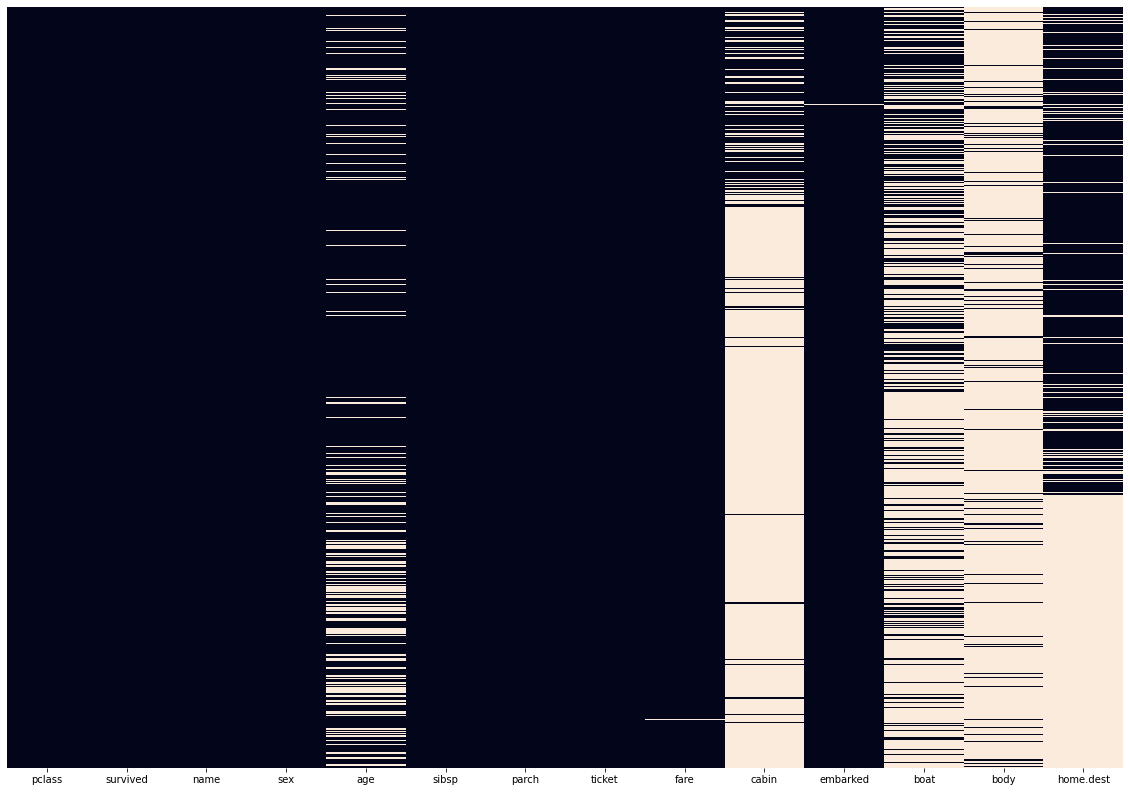

In [8]:
# Another way to visualize the missing values
plt.figure(figsize=(20, 14))
sns.heatmap(eda.isnull(), yticklabels=False, cbar=False)

In [9]:
# Percentage of missing values
missing_values = eda.isnull().sum()
missing_values[missing_values > 0] / len(eda) * 100

age          20.091673
fare          0.076394
cabin        77.463713
embarked      0.152788
boat         62.872422
body         90.756303
home.dest    43.086325
dtype: float64

In [10]:
# Drop irrelevant colums
eda.drop(
    [
        "name",
        "ticket",
        "boat",
        "body",
        "home.dest",
    ],
    axis=1,
    inplace=True,
)

In [11]:
# `age` has Null values, and we fix it using the mean value.
eda["age"] = eda["age"].fillna(value=eda["age"].mean())

In [12]:
# `embarked` has 2 Null valuess, and we fix it by filling the missing
# values with the most frequent(mode) values of the `embarked` column.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mode.html
# The one missing `fare` value can be replaced with the mean value.
eda["embarked"] = eda["embarked"].fillna(eda["embarked"].mode()[0])
eda["fare"] = eda["fare"].fillna(value=eda["fare"].mean())

In [13]:
# Cabin data: Cabin has a lot of missing values, but it can be an important
# predictor. Hypothesis: The lower the pclass, the lower the cabin was
# located in the ship making it harder to get to the lifeboats.
# Titanic deck plans: https://www.encyclopedia-titanica.org/titanic-deckplans/

# Keep the first letters of a cabin and use 'M' for missing
# (new variable 'Deck').  Then drop the `cabin` column.
eda["deck"] = eda["cabin"].apply(lambda s: s[0] if pd.notnull(s) else "M")
eda.drop(["cabin"], axis=1, inplace=True)

In [14]:
# Check
eda.isna().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
deck        0
dtype: int64

In [15]:
# Categorical data - All data must be numeric.
obj = eda.dtypes == object
print(obj)

pclass      False
survived    False
sex          True
age         False
sibsp       False
parch       False
fare        False
embarked     True
deck         True
dtype: bool


In [16]:
# `sex`, the new column `deck` (made from `cabin`), and `embarked`
# are categorical data.
print(eda["sex"].unique())
print(eda["deck"].unique())
print(eda["embarked"].unique())

['female' 'male']
['B' 'C' 'E' 'D' 'A' 'M' 'T' 'F' 'G']
['S' 'C' 'Q']


In [17]:
# These can be label-encoded.
labelencoder = LabelEncoder()

eda["sex"] = labelencoder.fit_transform(eda["sex"].values)
eda["embarked"] = labelencoder.fit_transform(eda["embarked"].values)
eda["deck"] = labelencoder.fit_transform(eda["deck"].values)
eda

pclass  survived  sex        age  sibsp  parch      fare  embarked  deck
0          1         1    0  29.000000      0      0  211.3375         2     1
1          1         1    1   0.920000      1      2  151.5500         2     2
2          1         0    0   2.000000      1      2  151.5500         2     2
3          1         0    1  30.000000      1      2  151.5500         2     2
4          1         0    0  25.000000      1      2  151.5500         2     2
...      ...       ...  ...        ...    ...    ...       ...       ...   ...
1304       3         0    0  14.500000      1      0   14.4542         0     7
1305       3         0    0  29.881138      1      0   14.4542         0     7
1306       3         0    1  26.500000      0      0    7.2250         0     7
1307       3         0    1  27.000000      0      0    7.2250         0     7
1308       3         0    1  29.000000      0      0    7.8750         2     7

[1309 rows x 9 columns]

In [18]:
# Dummy encoding the remaining column decks
# eda = pd.get_dummies(eda, drop_first=True)

In [19]:
# Set target 'survived' to be the last column
cols = eda.columns
cols

Index(['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'deck'],
      dtype='object')

In [20]:
cols = [
    "pclass",
    "sex",
    "age",
    "sibsp",
    "parch",
    "fare",
    "embarked",
    "deck",
    "survived",
]
eda = eda[cols]

In [21]:
eda.to_csv("datasets/cleaned_titanic.csv", index=False)